In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving NSDC - World Energy Consumption.csv to NSDC - World Energy Consumption.csv


In [121]:
df = pd.read_csv('NSDC - World Energy Consumption.csv')

In [122]:
df.head()

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,5.00,5.32,5.57,5.92,6.28,6.73,6.94,7.47,8.11,...,14.43,14.47,14.34,14.54,14.72,14.64,13.76,13.92,14.30,13.95
2,Mexico,1.06,1.12,1.14,1.24,1.36,1.45,1.53,1.69,1.82,...,8.03,7.94,8.11,8.26,8.15,8.07,7.35,7.83,8.18,8.45
3,US,51.98,54.89,56.80,60.19,63.30,65.54,66.92,70.25,73.22,...,93.59,92.69,92.62,92.97,96.37,95.68,88.64,93.44,95.42,94.28
4,Total North America,58.04,61.33,63.51,67.36,70.95,73.72,75.39,79.41,83.16,...,116.04,115.10,115.07,115.76,119.25,118.40,109.75,115.20,117.90,116.68


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  103 non-null    object
 1   1965     103 non-null    object
 2   1966     103 non-null    object
 3   1967     103 non-null    object
 4   1968     103 non-null    object
 5   1969     103 non-null    object
 6   1970     103 non-null    object
 7   1971     103 non-null    object
 8   1972     103 non-null    object
 9   1973     103 non-null    object
 10  1974     103 non-null    object
 11  1975     103 non-null    object
 12  1976     103 non-null    object
 13  1977     103 non-null    object
 14  1978     103 non-null    object
 15  1979     103 non-null    object
 16  1980     103 non-null    object
 17  1981     103 non-null    object
 18  1982     103 non-null    object
 19  1983     103 non-null    object
 20  1984     103 non-null    object
 21  1985     103 non-null    object
 22  19

In [124]:
df.isnull().sum()

,0
Country,8
1965,8
1966,8
1967,8
1968,8
1969,8
1970,8
1971,8
1972,8
1973,8


In [151]:
df = df.dropna()
df = df.dropna(subset=['Country'])

In [152]:
df.isnull().sum()

,0
Country,0
1965,0
1966,0
1967,0
1968,0
1969,0
1970,0
1971,0
1972,0
1973,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 1 to 110
Data columns (total 60 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  103 non-null    object
 1   1965     103 non-null    object
 2   1966     103 non-null    object
 3   1967     103 non-null    object
 4   1968     103 non-null    object
 5   1969     103 non-null    object
 6   1970     103 non-null    object
 7   1971     103 non-null    object
 8   1972     103 non-null    object
 9   1973     103 non-null    object
 10  1974     103 non-null    object
 11  1975     103 non-null    object
 12  1976     103 non-null    object
 13  1977     103 non-null    object
 14  1978     103 non-null    object
 15  1979     103 non-null    object
 16  1980     103 non-null    object
 17  1981     103 non-null    object
 18  1982     103 non-null    object
 19  1983     103 non-null    object
 20  1984     103 non-null    object
 21  1985     103 non-null    object
 22  1986   

In [128]:
df.head()

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Canada,5.00,5.32,5.57,5.92,6.28,6.73,6.94,7.47,8.11,...,14.43,14.47,14.34,14.54,14.72,14.64,13.76,13.92,14.30,13.95
2,Mexico,1.06,1.12,1.14,1.24,1.36,1.45,1.53,1.69,1.82,...,8.03,7.94,8.11,8.26,8.15,8.07,7.35,7.83,8.18,8.45
3,US,51.98,54.89,56.80,60.19,63.30,65.54,66.92,70.25,73.22,...,93.59,92.69,92.62,92.97,96.37,95.68,88.64,93.44,95.42,94.28
4,Total North America,58.04,61.33,63.51,67.36,70.95,73.72,75.39,79.41,83.16,...,116.04,115.10,115.07,115.76,119.25,118.40,109.75,115.20,117.90,116.68
6,Argentina,1.18,1.22,1.26,1.30,1.34,1.27,1.35,1.37,1.43,...,3.53,3.59,3.57,3.57,3.54,3.34,3.13,3.45,3.71,3.67


In [129]:
for year in range(1965, 2024):
    df[str(year)] = pd.to_numeric(df[str(year)], errors='coerce')

In [130]:
import plotly.express as px
import plotly.graph_objects as go

In [131]:
regions = df[df['Country'].str.contains('Total')]

regional_energy_trend_fig = go.Figure()
for index, row in regions.iterrows():
    regional_energy_trend_fig.add_trace(
        go.Scatter(
            x=row.index[1:], y=row.values[1:], mode='lines+markers', name=row['Country']
        )
    )
regional_energy_trend_fig.update_layout(
    title='Regional Energy Consumption Trends (1965-2023)',
    xaxis_title='Year',
    yaxis_title='Energy Consumption',
    legend_title='Region'
)
regional_energy_trend_fig.show()

In [132]:
global_energy_trend = df.iloc[:, 1:].sum()

global_energy_trend_fig = px.line(
    x=global_energy_trend.index,
    y=global_energy_trend.values,
    title='Global Energy Consumption Trend (1965-2023)',
    labels={'x': 'Year', 'y': 'Energy Consumption (in arbitrary units)'},
)
global_energy_trend_fig.update_layout(xaxis_title='Year', yaxis_title='Energy Consumption')
global_energy_trend_fig.show()

In [133]:
top_countries_2023 = df[['Country', '2023']].dropna().sort_values(by='2023', ascending=False).head(10)

top_countries_2023_fig = px.bar(
    top_countries_2023,
    x='Country',
    y='2023',
    title='Top 10 Energy-Consuming Countries in 2023',
    labels={'2023': 'Energy Consumption'}
)
top_countries_2023_fig.update_layout(xaxis_title='Country', yaxis_title='Energy Consumption')
top_countries_2023_fig.show()

In [134]:
decade_years = ['1965', '1975', '1985', '1995', '2005', '2015', '2023']
decade_data = df[['Country'] + decade_years]

decade_data_long = decade_data.melt(id_vars='Country', var_name='Year', value_name='Energy Consumption')

decade_data_long.head()

,Country,Year,Energy Consumption
0,Canada,1965,5.00
1,Mexico,1965,1.06
2,US,1965,51.98
3,Total North America,1965,58.04
4,Argentina,1965,1.18


In [135]:
comparison_fig = px.bar(
    decade_data_long,
    x='Country',
    y='Energy Consumption',
    color='Year',
    title='Comparison of Energy Consumption Between Decades',
    barmode='group',
    labels={'Energy Consumption': 'Energy Consumption'},
)
comparison_fig.update_layout(xaxis_title='Country', yaxis_title='Energy Consumption')
comparison_fig.show()

In [136]:
top_countries_decades = []

for year in decade_years:
    top_countries = df[['Country', year]].dropna().sort_values(by=year, ascending=False).head(10)
    top_countries['Year'] = year
    top_countries.columns = ['Country', 'Energy Consumption', 'Year']
    top_countries_decades.append(top_countries)

top_countries_decades_df = pd.concat(top_countries_decades)

top_countries_fig = px.bar(
    top_countries_decades_df,
    x='Country',
    y='Energy Consumption',
    color='Year',
    title='Top Energy Consumers for Each Decade',
    barmode='group',
    labels={'Energy Consumption': 'Energy Consumption'}
)
top_countries_fig.update_layout(xaxis_title='Country', yaxis_title='Energy Consumption')
top_countries_fig.show()

In [137]:
def plot_country_consumption(country):
    country_data = df[df['Country'] == country].drop(columns='Country').T
    country_data.columns = ['Consumption']
    plt.figure(figsize=(12, 6))
    plt.plot(country_data.index, country_data['Consumption'], marker='o')
    plt.title(f'Energy Consumption for {country}')
    plt.xlabel('Year')
    plt.ylabel('Energy Consumption')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

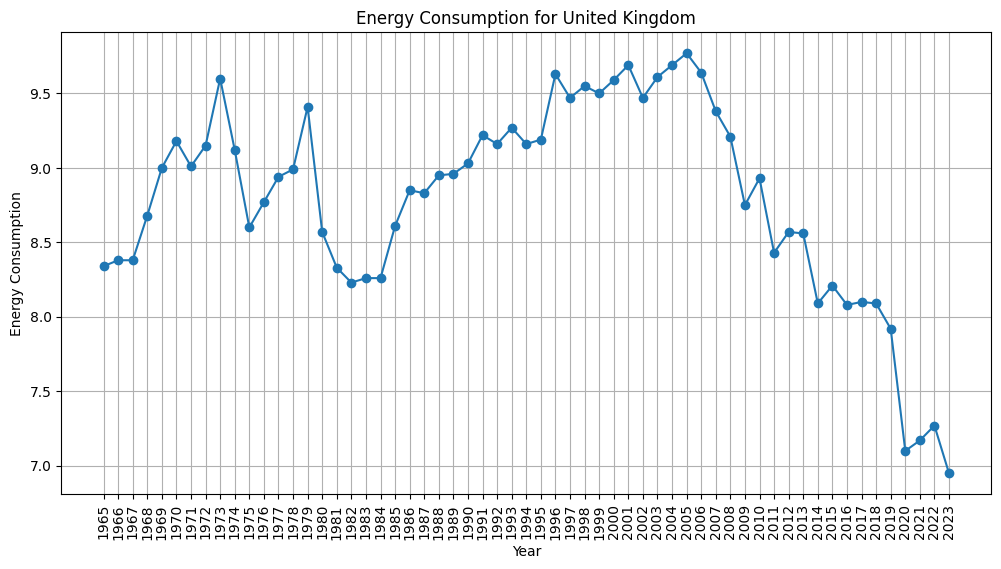

In [138]:
plot_country_consumption('United Kingdom')

In [139]:
def plot_yearly_comparison(year):
    plt.figure(figsize=(12, 6))
    plt.bar(df['Country'].astype(str), df[year])
    plt.title(f'Energy Consumption in {year}')
    plt.xlabel('Country')
    plt.ylabel('Energy Consumption')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

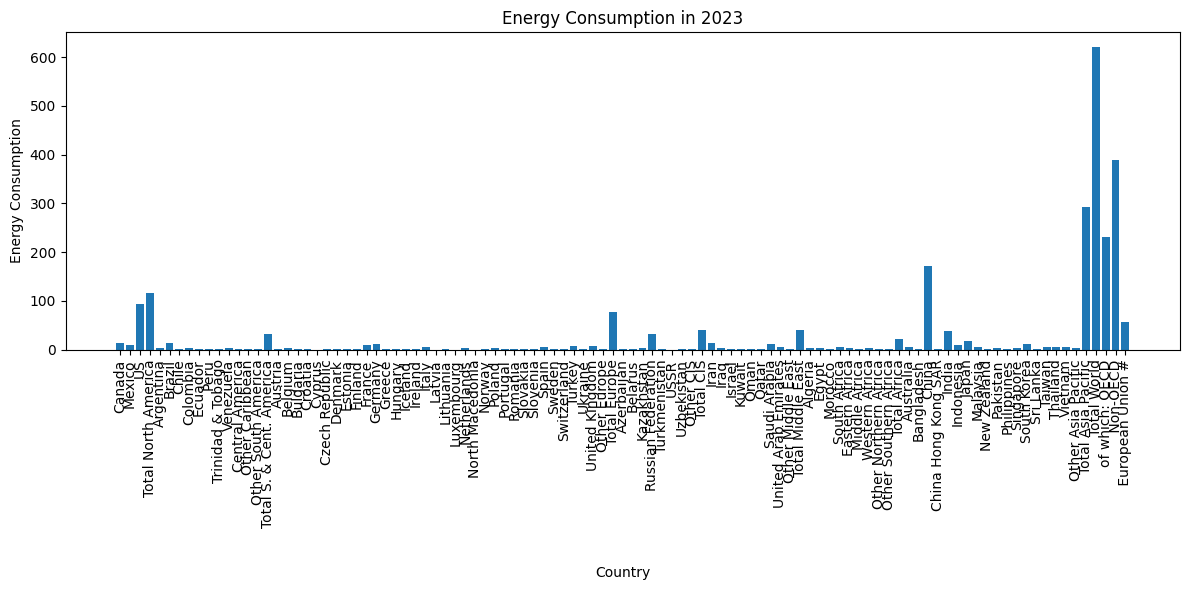

In [140]:
plot_yearly_comparison('2023')

In [141]:
df.head(5)

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Canada,5.00,5.32,5.57,5.92,6.28,6.73,6.94,7.47,8.11,...,14.43,14.47,14.34,14.54,14.72,14.64,13.76,13.92,14.30,13.95
2,Mexico,1.06,1.12,1.14,1.24,1.36,1.45,1.53,1.69,1.82,...,8.03,7.94,8.11,8.26,8.15,8.07,7.35,7.83,8.18,8.45
3,US,51.98,54.89,56.80,60.19,63.30,65.54,66.92,70.25,73.22,...,93.59,92.69,92.62,92.97,96.37,95.68,88.64,93.44,95.42,94.28
4,Total North America,58.04,61.33,63.51,67.36,70.95,73.72,75.39,79.41,83.16,...,116.04,115.10,115.07,115.76,119.25,118.40,109.75,115.20,117.90,116.68
6,Argentina,1.18,1.22,1.26,1.30,1.34,1.27,1.35,1.37,1.43,...,3.53,3.59,3.57,3.57,3.54,3.34,3.13,3.45,3.71,3.67


In [142]:
le = LabelEncoder()
df['CountryNumerical'] = le.fit_transform(df['Country'])

In [143]:
df

,Country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,CountryNumerical
1,Canada,5.00,5.32,5.57,5.92,6.28,6.73,6.94,7.47,8.11,...,14.47,14.34,14.54,14.72,14.64,13.76,13.92,14.30,13.95,12
2,Mexico,1.06,1.12,1.14,1.24,1.36,1.45,1.53,1.69,1.82,...,7.94,8.11,8.26,8.15,8.07,7.35,7.83,8.18,8.45,46
3,US,51.98,54.89,56.80,60.19,63.30,65.54,66.92,70.25,73.22,...,92.69,92.62,92.97,96.37,95.68,88.64,93.44,95.42,94.28,93
4,Total North America,58.04,61.33,63.51,67.36,70.95,73.72,75.39,79.41,83.16,...,115.10,115.07,115.76,119.25,118.40,109.75,115.20,117.90,116.68,87
6,Argentina,1.18,1.22,1.26,1.30,1.34,1.27,1.35,1.37,1.43,...,3.59,3.57,3.57,3.54,3.34,3.13,3.45,3.71,3.67,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Total Asia Pacific,18.91,20.73,21.55,23.13,26.52,30.36,33.01,35.30,37.94,...,229.36,231.54,241.10,251.16,259.38,258.34,272.15,278.81,291.77,83
107,Total World,156.10,164.64,170.68,180.89,193.32,205.80,213.98,225.72,238.79,...,547.33,552.99,566.11,581.47,588.05,567.60,596.62,607.35,619.63,89
108,of which: OECD,110.23,115.84,120.28,128.10,136.79,144.71,148.42,156.22,164.97,...,233.43,234.62,237.13,240.65,238.53,221.91,232.56,233.55,229.90,102
109,Non-OECD,45.87,48.80,50.40,52.79,56.54,61.09,65.56,69.50,73.82,...,313.89,318.36,328.98,340.81,349.52,345.69,364.07,373.80,389.73,1


In [153]:
X = df.drop(['Country','2023'], axis=1)
y = df['2023']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

In [156]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [157]:
y_pred = model.predict(X_test)
y_pred

array([ 11.45840762,  14.10860927,   1.14078711,   1.25345589,
         1.42377282,   3.63919401,   0.53814081,   0.95979779,
         3.8196723 ,  39.51223479,   8.70612232,   1.2475762 ,
         1.56995602, 229.84874581,   0.90617426,   3.94132735,
         3.38533782])

In [158]:
y_test

,2023
99,12.43
1,13.95
81,1.13
27,1.20
14,1.53
96,3.37
12,0.59
21,0.72
6,3.67
91,39.02


In [159]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error:", mse)
print(f"Mean Absolute Error:", mae)
print(f"Root Mean Squared Error :", rmse)

Mean Squared Error: 0.2907308229931653
Mean Absolute Error: 0.32342081690391644
Root Mean Squared Error : 0.539194605864307
